In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib
import scipy.special
import scipy.misc
from scipy.ndimage import rotate
from scipy.misc import face
import PIL
from PIL import Image
from IPython.display import clear_output
import os

%matplotlib inline

In [21]:
class neuralNetwork:
    def __init__(self, nodes, lr):
        self.nodes = nodes
        self.lr = lr
        self.layers = len(nodes)
        
        self.W = [numpy.random.normal(0.0, pow(self.nodes[i+1], -0.5), (self.nodes[i+1], self.nodes[i])) for i in range(0, self.layers-1)]
        
        self.activation_function = lambda x: scipy.special.expit(x)
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        outputs = inputs
        outputs_array = [outputs]
        for i in range(0, self.layers-1):
            outputs = self.activation_function(numpy.dot(self.W[i], outputs))
            outputs_array.append(outputs)
        errors = targets-outputs
        
        for i in range(self.layers-2, -1, -1):
            self.W[i] += self.lr * numpy.dot(((errors * outputs_array[i+1] * (1.0 - outputs_array[i+1]))), (numpy.transpose(outputs_array[i])))
            errors = numpy.dot(self.W[i].T, errors)
        
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        outputs = inputs
        
        for i in range(0, self.layers-1):
            outputs = self.activation_function(numpy.dot(self.W[i], outputs))
        
        return outputs
    def getRotateData(self, array, rot):
        img = Image.new('L', (28, 28))
        img.putdata(array)
        data = numpy.ravel(numpy.array(img.rotate(rot)))
        return data
    def getRotateImage(self, array, rot):
        img = Image.new('L', (28, 28))
        img.putdata(array)
        img = img.rotate(rot,fillcolor='white')
        return img
    def saveW(self):
        for i in range(self.layers-1):
            numpy.savetxt("weights/W"+str(i+1), self.W[i])
    def loadW(self):
        for i in range(self.layers-1):
            self.W[i] = numpy.loadtxt("weights/W"+str(i+1))
            if len(self.W[i].shape) == 1:
                self.W[i] = numpy.array([self.W[i]])
    def clearW(self):
        self.W = [numpy.random.normal(0.0, pow(self.nodes[i+1], -0.5), (self.nodes[i+1], self.nodes[i])) for i in range(0, self.layers-1)]
    #def toSymbol(self, num):
    #    dic = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:"+",11:"-",12:"*",13:":"}
    #    return dic[num]

In [22]:
#Данные нейросети
input_nodes = 784
output_nodes = 10
nodes = [input_nodes, 120, output_nodes]
learning_rate = 0.2
epohs = 8
generate_training_data = False

n = neuralNetwork(nodes, learning_rate)

In [23]:
#Запустить тренировку сети
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
lines = len(training_data_list)*epohs
index = 1
for ep in range(0, epohs):
    for record in training_data_list:
        clear_output()
        print(index,"/",lines)
        index+=1
        all_values = record.split(',')
        array = numpy.asfarray(all_values[1:])
        targets = numpy.zeros(output_nodes) + 0.01
        s = all_values[0]
        if s not in "+-*:":
            targets[int(s)] = 0.99
            if generate_training_data == True:
                for i in range(2, 10):
                    inputs = n.getRotateData(array, i)
                    inputs = (inputs / 255.0) * 0.99 + 0.01
                    n.train(inputs, targets)
            else:
                inputs = (array / 255.0) * 0.99 + 0.01
                n.train(inputs, targets)

800 / 800
[[0.00384713]
 [0.95317172]
 [0.01632768]
 [0.00938818]
 [0.05755647]
 [0.0212604 ]
 [0.00568649]
 [0.02872583]
 [0.00663511]
 [0.0060656 ]]


In [73]:
#Загрузить готовые веса
n.loadW()

In [79]:
#Тестирование нейросети
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
scor = 0
for record in test_data_list:
    all_values = record.split(',')
    array = numpy.asfarray(all_values[1:])
    inputs = (array / 255.0) * 0.99 + 0.01
    
    correct = int(all_values[0])
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    #print(label, correct)
    if(label == correct):
        scor+=1
print(scor*100/len(test_data_list),"%")
#image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
#matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

60.0 %


AttributeError: 'neuralNetwork' object has no attribute 'toSymbol'

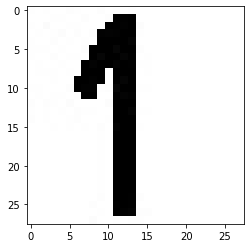

In [53]:
#Определение одной цифры
img = Image.open('my_tests/1.png')
img = img.resize((28, 28), PIL.Image.ANTIALIAS)
img = img.convert('L')
#img_array = scipy.misc.imread("my_tests/2.png", flatten=True)
#img_data = 255.0 - img_array.reshape(784)

img_data = 255.0-numpy.ravel(numpy.array(img))

matplotlib.pyplot.imshow(255.0-numpy.array(img), cmap="Greys", interpolation="None")


img_data = (img_data / 255.0 * 0.99) + 0.01
outputs = n.query(img_data)
label = numpy.argmax(outputs)
print(n.toSymbol(label), "(", outputs[label]*100, "% )")

img.close()

: ( [14.14401796] % )
1 ( [14.10442384] % )


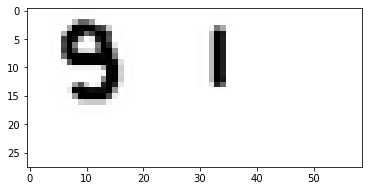

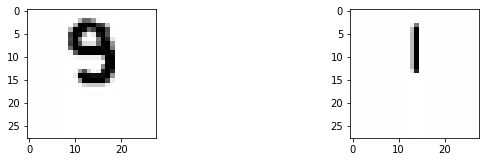

In [13]:
#Определение нескольких цифр
img = Image.open('www.png')
(w, h) = img.size
width = (28*w)//h
img = img.resize((width, 28), PIL.Image.ANTIALIAS)
img = img.convert('L')

img_data = 255.0-numpy.ravel(numpy.array(img))
matplotlib.pyplot.imshow(255.0-numpy.array(img), cmap="Greys", interpolation="None")

arr = numpy.asarray(img, dtype='uint8').T
Sr=255

ss = []
xx = 0
mode = False

for x in range(0, width):
    find = False
    for y in range(0, 28):
        pixel = int(arr[x][y])
        if abs(Sr-pixel)<=50:
            Sr=(pixel+Sr)//2
        else:
            find = True
            if not mode:
                ss.append(x)
                mode = True
    if mode:
        if find:
            xx = x
        else:
            ss.append(xx)
            mode = False
if mode == True:
    ss.append(width)

rows = 10
columns = 5
fig=plt.figure(figsize=(28, 28))
for i in range(1, len(ss)):
    if i%2 != 0:
        area = (ss[i-1], 0, ss[i], 28)
        cropped_img = img.crop(area)
        im = Image.new('L', (28, 28), int(Sr))
        im.paste(cropped_img, ((14-(ss[i]-ss[i-1])//2), 0))
        array = numpy.array(im)
        img_data = 255.0-numpy.ravel(array)
    
        fig.add_subplot(rows, columns, i//2 + 1)
        plt.imshow(255.0-array, cmap="Greys", interpolation="None")
    
        img_data = (img_data / 255.0 * 0.99) + 0.01
        outputs = n.query(img_data)
        label = numpy.argmax(outputs)
        print(n.toSymbol(label), "(", outputs[label]*100, "% )")
        im.close()
plt.show()

3
1


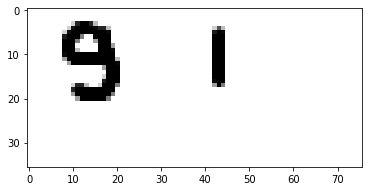

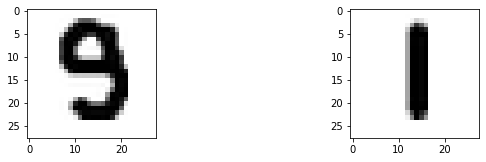

In [29]:
#Определение нескольких цифр lvl up
img = Image.open('www.png')
(w, h) = img.size
img = img.convert('L')

img_data = 255.0-numpy.ravel(numpy.array(img))
matplotlib.pyplot.imshow(255.0-numpy.array(img), cmap="Greys", interpolation="None")

arr = numpy.asarray(img, dtype='uint8').T
Sr=255
used = numpy.zeros([w, h])
v = [w-1, h-1, 0, 0]
res = []

def f(start_x, start_y):
    global used
    if used[start_x][start_y]:
        return
    if start_x<0 or start_x >= w or start_y < 0 or start_y >= h:
        return
    pixel = int(arr[start_x][start_y])
    if abs(pixel-Sr)<30:
        return
    global v
    used[start_x][start_y] = True
    v[0]=min(v[0], start_x)
    v[1]=min(v[1], start_y)
    v[2]=max(v[2], start_x)
    v[3]=max(v[3], start_y)
    f(start_x+1, start_y)
    f(start_x-1, start_y)
    f(start_x, start_y+1)
    f(start_x, start_y-1)
    f(start_x+1, start_y+1)
    f(start_x-1, start_y+1)
    f(start_x+1, start_y-1)
    f(start_x-1, start_y-1)
    
for y in range(0, h):
    for x in range(0, w):
        if not used[x][y]:
            pixel = int(arr[x][y])
            if abs(Sr-pixel)>=50:
                v = [w-1, h-1, 0, 0]
                f(x, y)
                res.append(v)
            else:
                Sr=(pixel+Sr)//2
rows = 10
columns = 5
i = 1
fig=plt.figure(figsize=(28, 28))
for area in res:
    area[3]+=1
    area[2]+=1
    area[0]-=1
    area[1]-=1
    cropped_img = img.crop(area)
    (ww, hh) = cropped_img.size
    k = 23
    im = Image.new('L', (28, 28), int(Sr))
    if hh>=ww:
        cropped_img = cropped_img.resize(((k*ww)//hh, k), PIL.Image.ANTIALIAS)
        im.paste(cropped_img, ((14-(k*(area[2]-area[0]))//(2*hh)), (14-(k*(area[3]-area[1]))//(2*hh))-2))
    else:
        cropped_img = cropped_img.resize((k, ((k*hh)//ww)), PIL.Image.ANTIALIAS)
        im.paste(cropped_img, ((14-(k*(area[2]-area[0]))//(2*ww)), (14-(k*(area[3]-area[1]))//(2*ww))-2))
    array = numpy.array(im)
    img_data = 255.0-numpy.ravel(array)
    
    fig.add_subplot(rows, columns, i)
    i=i+1
    plt.imshow(255.0-array, cmap="Greys", interpolation="None")
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    outputs = n.query(img_data)
    label = numpy.argmax(outputs)
    print(n.toSymbol(label))

plt.show()

In [239]:
def imagetoarray():
    datas = open("mnist_dataset/my_trains.csv", 'a')
    v = os.listdir("my_trains/chast")
    for file in v:
        img = Image.open("my_trains/chast/"+str(file))
        img = img.resize((28, 28), PIL.Image.ANTIALIAS)
        img = img.convert('L')
        img_array = 255-numpy.ravel(numpy.array(img))
        array = numpy.ravel(img_array)
        array = ','.join(map(str, array))
        array=":,"+array+"\n"
        datas.write(array)
def duplicate_rotates_image(path):
    img = Image.open(str(path))
    img = img.resize((28, 28), PIL.Image.ANTIALIAS)
    img = img.convert('L')
    img_array = numpy.ravel(numpy.array(img))
    v = [-5,0,5]
    for rot in v:
        new_img = n.getRotateImage(img_array, rot)
        new_img.save("my_trains/mult/1_"+str(rot)+".png")

In [180]:
#duplicate_rotates_image('my_trans/1.png')
imagetoarray()

In [80]:
n.saveW()